In [102]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

np.random.seed(41)

In [127]:
def generate_data(d, N, noise=0):
    X = np.ones((N,1))
    X = np.append(X, -2*np.random.random_sample((N, d))+1,1)
    col_names = [f'x_{i}' for i in range(0,d+1)]
    
    w_init = np.array([0])
    w_init = np.append(w_init, -2*np.random.random_sample((d, 1)))
    
    y = np.sign(np.dot(X, w_init))
    
    df = pd.DataFrame(columns=col_names, data=X)
    df['y'] = y
    
    if noise > 0:
        y_noise = [-1*y[i] for i in range(0, noise)]
        y = np.append(y_noise, y[noise:])
        df['y'] = y
    
    return df

In [128]:
def plot_dataset(df, m=None):
    x = df['x_1']
    y = df['x_2']
    label = df['y']
    plt.scatter(x, y, c=label)
    plt.xlabel('x_1')
    plt.xlim([-1, 1])
    plt.ylabel('x_2')
    plt.ylim([-1, 1])
    plt.title(f'Dataset N={df.shape[0]}')
    
    if m is not None:
        x_min = -1
        x_max = 1
        y_min = (1/m[2]) * (-x_min*m[1])
        y_max = (1/m[2]) * (-x_max*m[1])
        plt.plot([x_min, x_max], [y_min, y_max], 'r')

In [129]:
low_dim_data = generate_data(2, 100)
low_dim_data.head()

,x_0,x_1,x_2,y
0,1.0,-0.693508,-0.243694,1.0
1,1.0,-0.600931,-0.312959,1.0
2,1.0,0.400153,-0.264189,1.0
3,1.0,-0.097479,-0.245252,1.0
4,1.0,0.291150,0.584316,-1.0


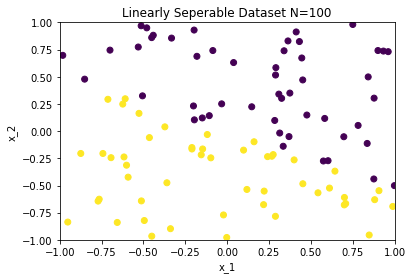

In [130]:
plot_dataset(low_dim_data)

In [131]:
def pla(df, max_rounds, verbose=False):
    X = df.iloc[:,:-1]
    y = df['y']
    
    w = np.array([0])
    w = np.append(w, -2*np.random.random_sample((X.shape[1]-1, 1)))
    
    rounds = 0
    while rounds < max_rounds:
        y_pred = np.sign(np.dot(X, w))
        errors = [i for i in range(0, len(y)) if y[i] != y_pred[i]]
        if len(errors) == 0:
            return w, rounds
        rounds += 1
        if verbose:
            print(f'Round {round}, Total Errors: {len(errors)}')
        y_t = y[errors[0]]
        x_t = X.iloc[errors[0]].values
        w = w + (y_t * x_t)

    return w, rounds

In [132]:
w, rounds = pla(low_dim_data, 10000)
w

array([  0.        ,  -7.03434573, -13.23408349])

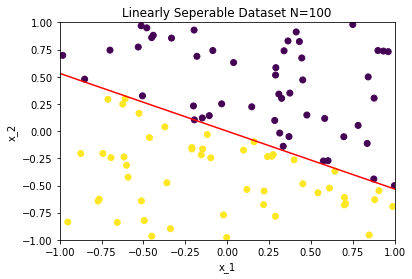

In [133]:
plot_dataset(low_dim_data, w)

In [134]:
noisey_data = generate_data(2, 100, 10)

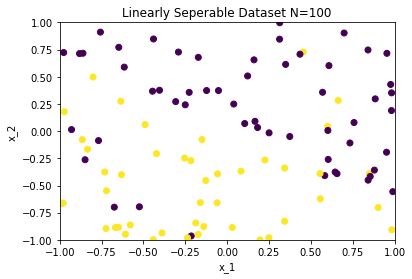

In [136]:
plot_dataset(noisey_data)

In [ ]:
def pocket_pla(df):
    X = df.iloc[:,:-1]
    y = df['y']
    
    w = np.array([0])
    w = np.append(w, -2*np.random.random_sample((X.shape[1]-1, 1)))